## K-means

Алгоритм К-средних, наверное, самый популярный и простой алгоритм кластеризации и очень легко представляется в виде простого псевдокода:

    1.Выбрать количество кластеров k, которое нам кажется оптимальным для наших данных.

    2.Высыпать случайным образом в пространство наших данных k точек (центроидов).

    3.Для каждой точки нашего набора данных посчитать, к какому центроиду она ближе.

    4.Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду.

    5.Повторять последние два шага фиксированное число раз, либо до тех пор пока центроиды не "сойдутся" (обычно это значит, что их смещение относительно предыдущего положения не превышает какого-то заранее заданного небольшого значения).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

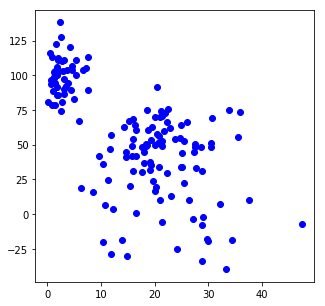

In [50]:
# Начнём с того, что насыпем на плоскость три кластера точек
X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.chisquare(df = 3, size=50)
X[:50, 1] = np.random.chisquare(df = 100, size=50)

X[50:100, 0] = np.random.normal(20, 10, size=50)
X[50:100, 1] = np.random.normal(20, 30, size=50)

X[100:150, 0] = np.random.chisquare(df = 20, size=50)
X[100:150, 1] = np.random.chisquare(df = 50, size=50)

plt.figure(figsize=(5, 5))
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.show()

In [59]:
# В scipy есть замечательная функция, которая считает расстояния
# между парами точек из двух массивов, подающихся ей на вход
from scipy.spatial.distance import cdist

# Прибьём рандомность и насыпем три случайные центроиды для начала
np.random.seed(seed=7)
n_clusters = 5
centroids = np.random.normal(loc=0.0, scale=100., size=n_clusters * 2)
centroids = centroids.reshape((n_clusters, 2))

cent_history = []
cent_history.append(centroids)

steps = 10

for i in range(steps):
    # Считаем расстояния от наблюдений до центроид
    distances = cdist(X, centroids)
    # Смотрим, до какой центроиде каждой точке ближе всего
    labels = distances.argmin(axis=1)

    # Положим в каждую новую центроиду геометрический центр её точек
    centroids = centroids.copy()
    for i in range(n_clusters):
        centroids[i, :] = np.mean(X[labels == i, :], axis=0)

    cent_history.append(centroids)


/home/maximus/anaconda3/envs/cs/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/maximus/anaconda3/envs/cs/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [52]:
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [53]:
get_cmap(10)

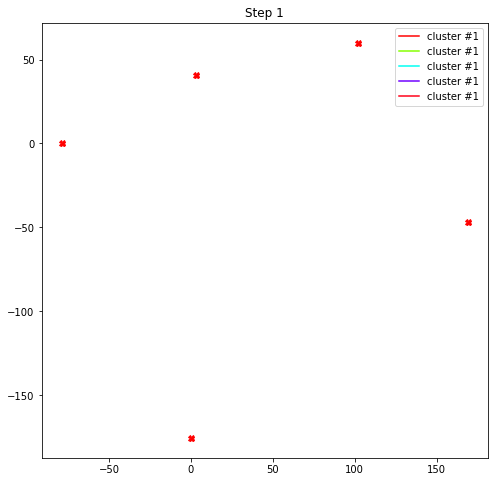

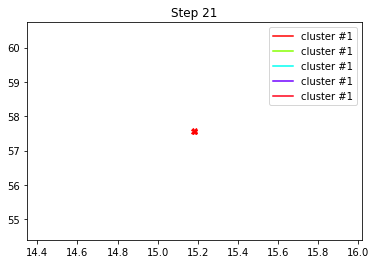

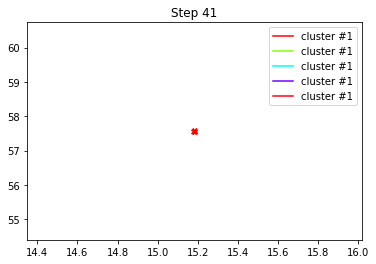

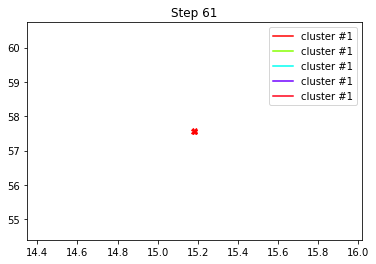

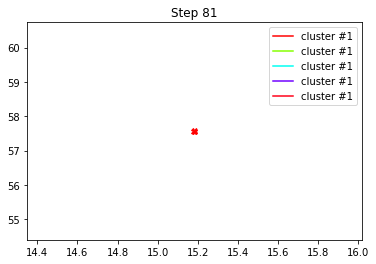

In [58]:
plt.figure(figsize=(8, 8))
for i in range(0, steps, steps // 5):
    distances = cdist(X, cent_history[i])
    labels = distances.argmin(axis=1)

    #plt.subplot(steps // 2, steps // 2, i + 1)
    for j in range(n_clusters):
        plt.plot(X[labels == i, 0], X[labels == i, 1], c=get_cmap(n_clusters)(j), label='cluster #1')
    plt.plot(cent_history[i][:, 0], cent_history[i][:, 1], 'rX')
    plt.legend(loc=0)
    plt.title('Step {:}'.format(i + 1))
    plt.show()


## Агломеративная кластеризация

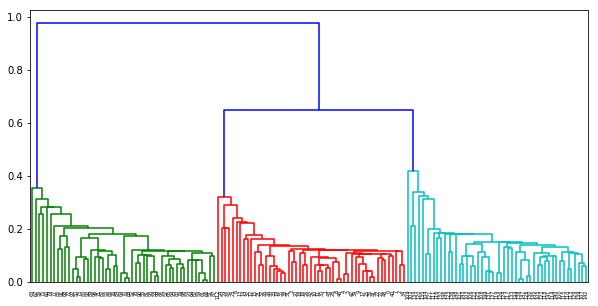

In [26]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150, 2))

np.random.seed(seed=42)
X[:50, 0] = np.random.normal(loc=0.0, scale=.3, size=50)
X[:50, 1] = np.random.normal(loc=0.0, scale=.3, size=50)

X[50:100, 0] = np.random.normal(loc=2.0, scale=.5, size=50)
X[50:100, 1] = np.random.normal(loc=-1.0, scale=.2, size=50)

X[100:150, 0] = np.random.normal(loc=-1.0, scale=.2, size=50)
X[100:150, 1] = np.random.normal(loc=2.0, scale=.5, size=50)

distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z, color_threshold=0.5) # строим дендграмму
plt.show()